In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# reading the dataset
book = pd.read_csv("E:/book.csv")

In [3]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [5]:
book.shape

(2000, 11)

In [6]:
book.mean()

ChildBks     0.4230
YouthBks     0.2475
CookBks      0.4310
DoItYBks     0.2820
RefBks       0.2145
ArtBks       0.2410
GeogBks      0.2760
ItalCook     0.1135
ItalAtlas    0.0370
ItalArt      0.0485
Florence     0.1085
dtype: float64

In [7]:
# defining the support criteria
print(min(book.mean()),max(book.mean()))

0.037 0.431


In [8]:
## Aprior algorithm

In [9]:
# for 0.1 support
frequent_itemsets1 = apriori(book, min_support=0.1, use_colnames = True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [10]:
# for 0.2 support
frequent_itemsets2 = apriori(book, min_support=0.2, use_colnames = True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [11]:
# for 0.3 support
frequent_itemsets3 = apriori(book, min_support=0.3, use_colnames = True)
frequent_itemsets3

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


In [12]:
# confidence for frequent_itemset1
rules = association_rules(frequent_itemsets1, metric = 'confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [13]:
# confidence for frequent_itemset2
rules = association_rules(frequent_itemsets2, metric = 'confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


In [14]:
rules = association_rules(frequent_itemsets1, metric = 'confidence', min_threshold=0.6)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
24,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628
29,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063
26,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.282,0.1015,0.607784,2.155264,0.054406,1.830626
25,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
27,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
17,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
23,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
28,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
12,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545


In [15]:
# lift ratio greater than 1
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [16]:
# lift ratio greater than 2
rules[rules.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
24,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628
26,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.282,0.1015,0.607784,2.155264,0.054406,1.830626
29,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

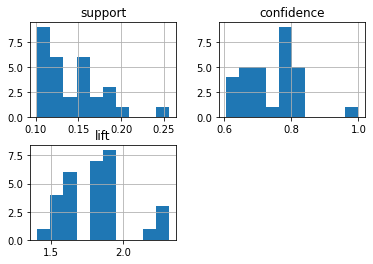

In [17]:
# visualization for support, confidence, lift
rules[['support','confidence','lift']].hist()

<AxesSubplot:>

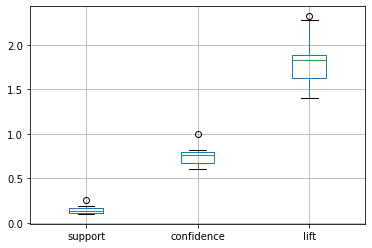

In [18]:
rules[['support','confidence','lift']].boxplot()

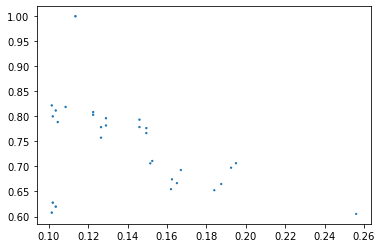

In [19]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'], rules['lift'])
plt.show()